In [1]:
from csw2022 import *

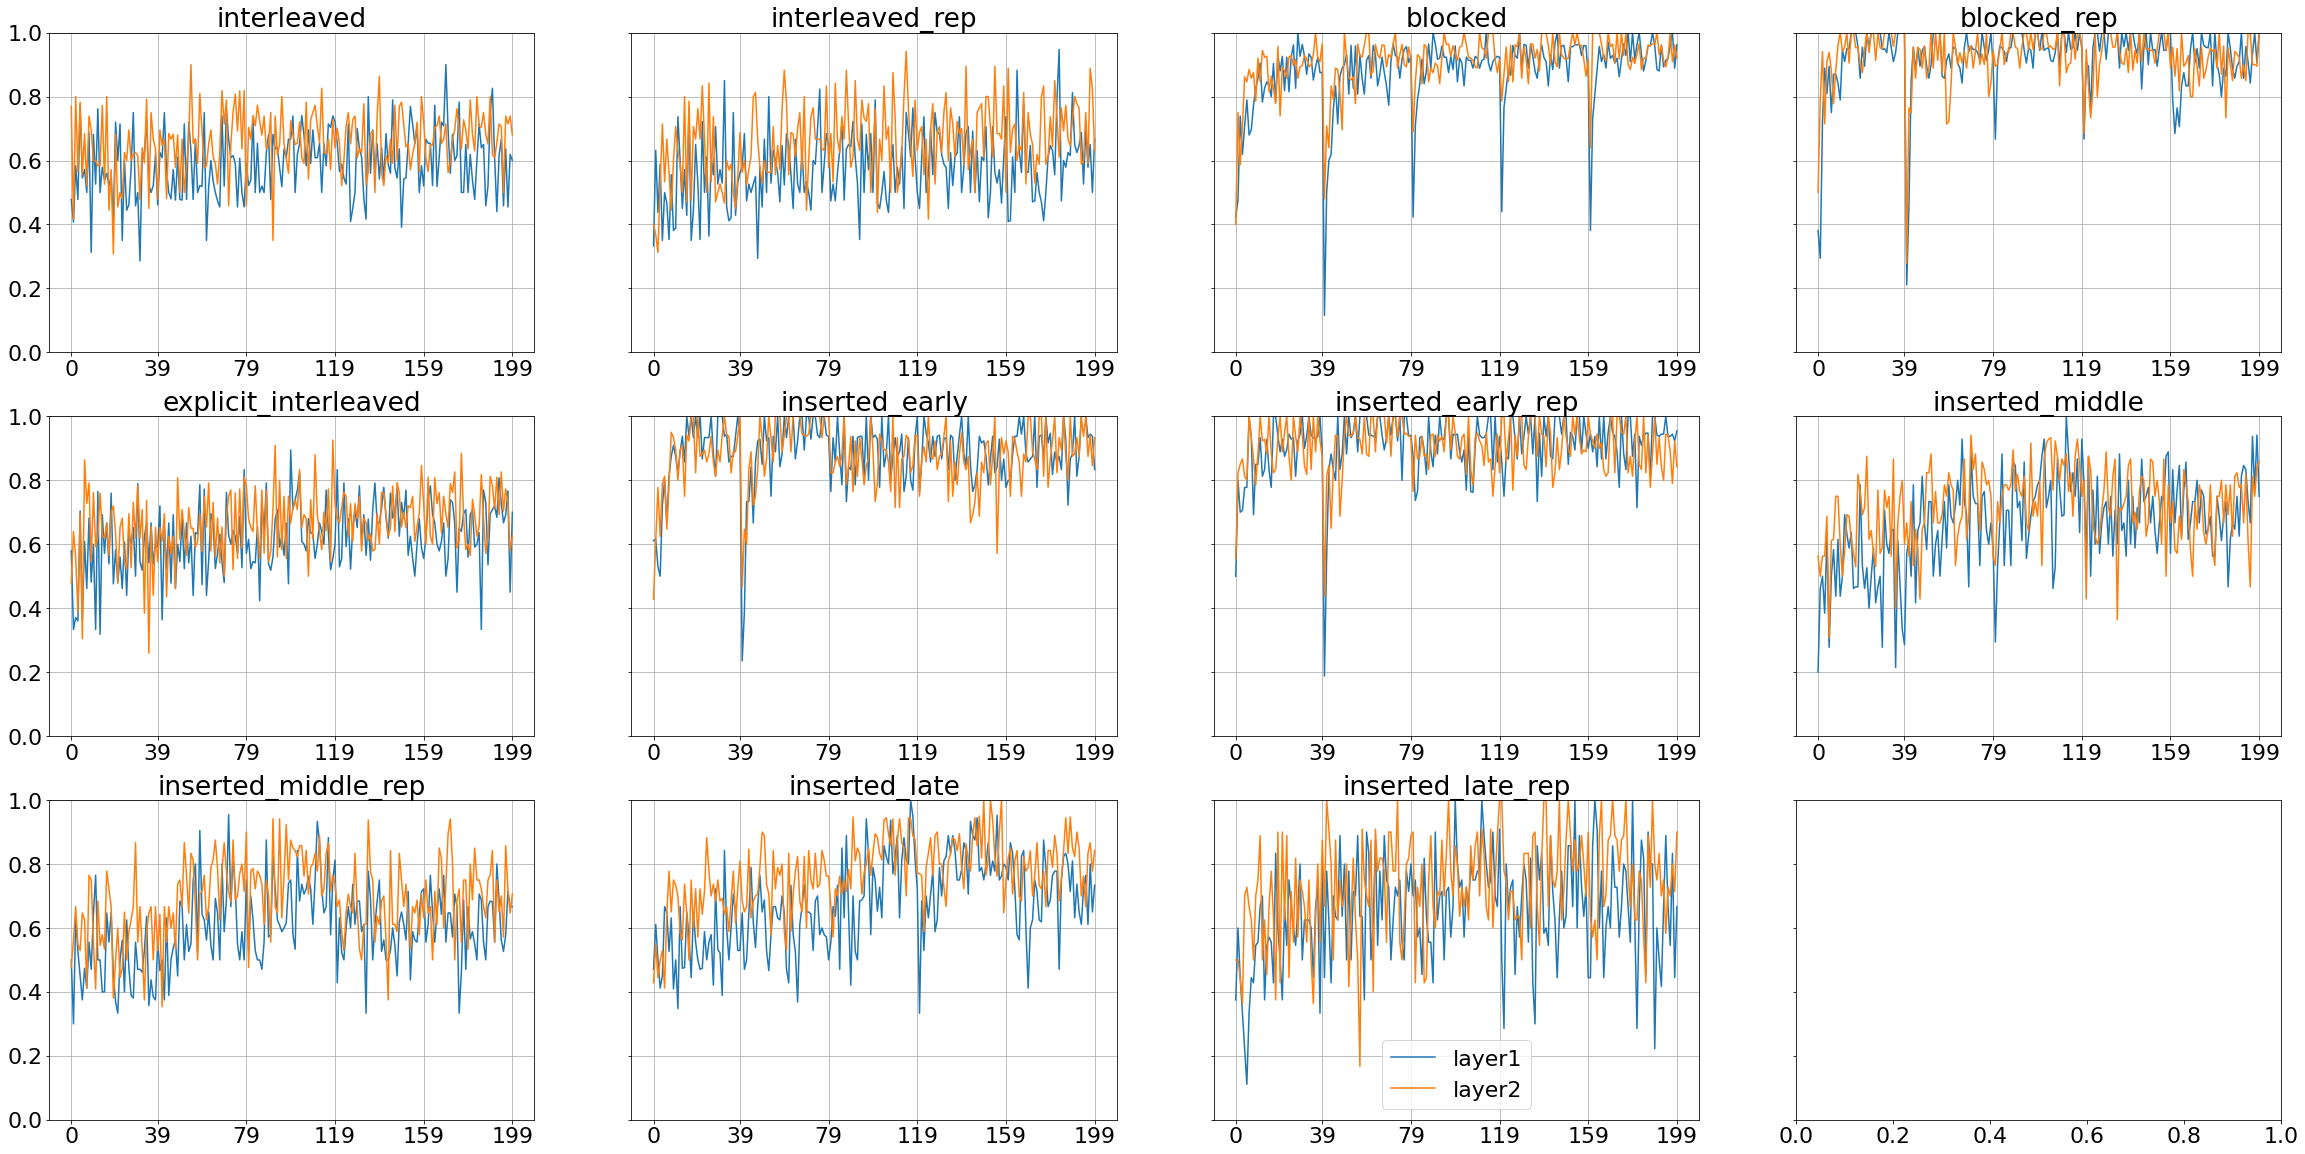

In [2]:
fg,axar = plt.subplots(3,4,figsize=(40,20),sharey=True);axar=axar.reshape(-1)
for ci,condition in enumerate(conditionL):
  ax=axar[ci]
  ## ENSURE RAW SCORES FROM UPDATE INTERLEAVED
  df = pd.read_csv("experiment_data/raw_scores/%s.csv"%condition)
  for didx in range(1,3):
    # takes mean over subjects
    acc = df[df.depth==didx].groupby(['story']).correct_response.mean()
    np.save("experiment_data/raw_scores/acc-by-tstep/%s-tstep%i"%(condition,didx),acc)
#     print()
    ax.plot(acc,label='layer%i'%didx)
  ax.set_ylim(0,1)
  ax.set_title(condition)
  ax.set_xticks([0,39,79,119,159,199])
  ax.grid()
ax.legend()
# plt.savefig('figures/2022/acc-by-layer')

## save out split acc

In [3]:
D = {}
for ci,condition in enumerate(conditionL):

  df = pd.read_csv("experiment_data/raw_scores/%s.csv"%condition)
  for didx in range(1,3):
    # takes mean over subjects
    acc = df[df.depth==didx].groupby(['story']).correct_response.mean()
    D['%s-step%i'%(condition,didx)] = acc
pd.DataFrame(D).to_csv("../human_data_split_tstep.csv")